# Inferential Statistics Ib - Frequentism

## Learning objectives

Welcome to the second Frequentist inference mini-project! Over the course of working on this mini-project and the previous frequentist mini-project, you'll learn the fundamental concepts associated with frequentist inference. The following list includes the topics you will become familiar with as you work through these two mini-projects:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

## Prerequisites

* what a random variable is
* what a probability density function (pdf) is
* what the cumulative density function is
* a high-level sense of what the Normal distribution

If these concepts are new to you, please take a few moments to Google these topics in order to get a sense of what they are and how you might use them.

These two notebooks were designed to bridge the gap between having a basic understanding of probability and random variables and being able to apply these concepts in Python. This second frequentist inference mini-project focuses on a real-world application of this type of inference to give you further practice using these concepts. 

In the previous notebook, we used only data from a known normal distribution. You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.

## Hospital medical charges

Imagine that a hospital has hired you as their data analyst. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. This mini-project, as well as the bootstrap and Bayesian inference mini-projects also found in this unit are designed to illustrate how each of the inferential statistics methods have their uses for different use cases. In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?
Answering that last question with a frequentist approach makes some assumptions, or requires some knowledge, about the two groups. In the next mini-project, you'll use bootstrapping to test that assumption. And in the final mini-project of the unit, you're going to create a model for simulating _individual_ charges (not a sampling distribution) that the hospital can use to model a range of scenarios.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). For the purposes of this exercise, assume the observations are the result of random sampling from our one hospital. Recall in the previous assignment, we introduced the Central Limit Theorem (CLT), and how it tells us that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data. Remember, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')
import scipy.stats

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A: The distribution is clearly not normal and is right skewed. The variation in the data is pretty high because the std 
is almost 90% of the mean.__

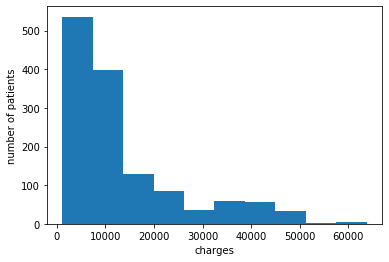

In [5]:
_ =plt.hist(medical['charges'])
_ =plt.xlabel('charges')
_ =plt.ylabel('number of patients')

In [6]:
sample_mean= np.mean(medical['charges'])
print('sample mean of hospital charges is: ', sample_mean)
sample_std= np.std(medical['charges'])
print('\nsample std of hospital charges is: ', sample_std)

sample mean of hospital charges is:  13270.422265141257

sample std of hospital charges is:  12105.484975561605


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A: As seen before the distribution of the hospital charges is not normal, so to model it as a normal or t distribution, we need to verfiy certain things:__

__Whether the sampling was random: as stated above, for the purposes of this exercise, assuming the observations are the result of random sampling from one hospital.__


__Is the distribution normal or n>=30: the distribution is not normal but n>=30 so we can assume that the sample distribution of the sample means will be normally distributed.__

__Are the samples independent of each other: Yes, we can assume that here since each patient's expenditure will be independent of each other and also we can use the 10% rule that the number of patients sampled here are only 10% or less of the total number of patients visiting the hospital.__

__Now, since we are not given with the standard deviation of the actual population, we need to use t-statistic to avoid under estimating the standard deviation. We can use hypothesis test with t-statistic to find out if the average charge has fallen below 12000. Having said that, the sample size is very large here (~1300+), so we can use z test too; we should expect to see similar results for both the tests.__

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A: If the average charge has actually fallen below 12000 then the administrator will be very concerned because that can threaten the hospital's operational model.So, we need to use a high confidence leve here. Let's use 95%. And since the concern is only limited to if the charge has fallen below a threshold, we need to calculate a one sided interval.__

In [7]:
# Estimating the population std by using n-1 in the denominator
pop_std= np.std(medical['charges'], ddof=1)
#sample size n
n= len(medical['charges'])

In [8]:
#Calculate the critical value and the relevant 95% confidence interval for the mean 
"""Calculating the critical t value; We need to pass the df argument for using the t distribution. The degrees of freedom in this 
case is n-1. And using 0.05 as the probability because we are looking at the left tail only."""

t_value=(t.ppf(0.05, n-1, loc=sample_mean, scale=pop_std)-sample_mean)/pop_std
t_value=round(t_value,2)
print('The critical t value for this sample distribution for 95% confidence is: '+str(t_value))

The critical t value for this sample distribution for 95% confidence is: -1.65


In [9]:
#Calculate the critical value and the relevant 95% confidence interval for the mean 

""" We need to calculate the minimum value given by the above critical t value such that this minimum value and all values
below it will have a <=5% chance of occurence."""
#calculating standard error
SE= pop_std/np.sqrt(n) 
MOE_t= t_value*SE
print('MOE by using t statistic is:', MOE_t)
print('\nThus, 95% of the times we can expect the mean to be greater than '+ str(sample_mean+MOE_t))

MOE by using t statistic is: -546.2612996208757

Thus, 95% of the times we can expect the mean to be greater than 12724.160965520381


__As observed above, 95% of the times we would expect the population mean to be above 12724.16 and since
that is much greater than the suspected 12000, the administrator need not be concerned that the
mean has fallen below 12000 because the probability of getting a mean of 12000 is lower than 5%.__

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A: The assumptions here will be same as that mentioned above for single sample- random sample, normally distributed, independent sampling. We can design two hypotheses here:__

__Null hypothesis H0: People with insurance are charged the same amount as the people without insurance. We assume that H0 is true and then calculate the p_value and check if it lies below or above our significance level.
Alternative hypothesis: People with insurance are charged a different amount than the people with insurance.__ 

In [10]:
# Manual calculation
## Listing the characteristics of the two samples
sample1= medical[medical['insuranceclaim']==1]['charges'] #sampling people with insurance
sample2= medical[medical['insuranceclaim']==0]['charges'] #sampling people without insurance

n0= len(sample1)
n1= len(sample2)

x0= np.mean(sample1)
x1= np.mean(sample2)

s0= np.std(sample1, ddof=1)
#s0= s0_sample/np.sqrt(n0)
s1= np.std(sample2, ddof=1)
#s1= s1_sample/np.sqrt(n1)

#calculating the pooled standard deviation of samples 1 and 2 using the formula given above
sp= np.sqrt(((n0-1)*s0**2+(n1-1)*s1**2)/(n0+n1-2))

#calculating the t test statistic using the formula given above
t_stat= (x0-x1)/(sp*np.sqrt(1/n0+1/n1))
print ('The t_stat for this distribution is: ', t_stat)

#Calculating the p-value using t.cdf and subtracting it from 1 because we want the area on the right 
p_value= 1-t.cdf(t_stat*sp, n0+n1-2)
print ('The pvalue for this distribution is: ', p_value)

The t_stat for this distribution is:  11.89329903087671
The pvalue for this distribution is:  0.0


In [16]:
# Since the t-value is 11.89 (which is very large), the p-value can be expected to be very small.
# Using scipy.stats function for performing t-test on two independent samples
scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1,equal_var=True)

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

__Since the p-value is less than our significance level alpha=0.05 we can reject the null hypothesis and say with 
confidence that people with insurance are charged a different amount than the people with insurance.__

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__

In [18]:

# Using scipy.stats function with different variances
scipy.stats.ttest_ind_from_stats(x0, s0, n0, x1, s1, n1, equal_var=False)

Ttest_indResult(statistic=13.298031957975647, pvalue=1.1105103216309438e-37)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A: There is no function in the scipy stats for performing a z test. But other Python library named statsmodels.stats. has a function called ztest_ind which can be used to perform the z test.__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test